In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from BCI2kReader import BCI2kReader as b2k
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image as im
import os
from sklearn.preprocessing import normalize #machine learning algorithm library

In [6]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [7]:
def quantilee(a):
    Q1 = np.quantile(a, .25)
    Q3 = np.quantile(a, .75)
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    return min_IQR, max_IQR

In [8]:
def data_extraction_all(raw, labels):
    combine_dataframe = []
    for i in range(16):
        mean = raw.values[i].mean() #mean setiap channel (channel = index array)
        combine_dataframe.append(float(mean))

        std = raw.values[i].std()
        combine_dataframe.append(float(std))

        snr = signaltonoise(raw.values[i])
        combine_dataframe.append(float(snr))
        
        min_iqr, max_iqr = quantilee(raw.values[i])
        combine_dataframe.append(float(min_iqr))
        combine_dataframe.append(float(max_iqr))
        
    combine_dataframe.append(labels)
    #final_dataframe = pd.DataFrame(combine_dataframe, index = ['FP1_mean', 'FP1_std', 'FP1_snr', 'F3_mean', 'F3_std', 'F3_snr', 'F7_mean', 'F7_std', 'F7_snr', 'T3_mean', 'T3_std', 'T3_snr','T5_mean', 'T5_std', 'T5_snr','O1_mean', 'O1_std', 'O1_snr','C4_mean', 'C4_std', 'C4_snr','FP2_mean', 'FP2_std', 'FP2_snr','Fz_mean', 'Fz_std', 'Fz_snr','F4_mean', 'F4_std', 'F4_snr','F8_mean', 'F8_std', 'F8_snr','C3_mean', 'C3_std', 'C3_snr','Cz_mean', 'Cz_std', 'Cz_snr','Pz_mean', 'Pz_std', 'Pz_snr','Oz_mean', 'Oz_std', 'Oz_snr','O2_mean', 'O2_std', 'O2_snr', 'label'])
    final_dataframe = pd.DataFrame(combine_dataframe)
    final_dataframe = pd.DataFrame.transpose(final_dataframe)
    final_dataframe.reset_index()
    return final_dataframe

In [9]:
import glob
import os
df_normal = pd.DataFrame([], )
label = 'NORMAL'
for filename in glob.glob('./dataset - Copy/normal/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:5000]
        raw = pd.DataFrame(my_signals)
        #raw_fix = pd.concat([raw, raw])
        #raw_fix = pd.DataFrame.transpose(raw)
        
        df_normal = df_normal.append(data_extraction_all(raw, label))
        
        #df.append(data_extraction_all(raw))
df_normal.reset_index(drop=True, inplace=True)        

In [45]:
df_normal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.624347,23.979383,-0.026037,-71.956501,69.679501,0.116477,19.913599,0.005849,-50.457,49.137,...,21.025196,0.0485,-55.015124,56.557873,0.225384,22.052794,0.01022,-55.864875,57.292126,NORMAL
1,-0.676386,19.131838,-0.035354,-49.1865,46.513501,0.368772,17.258625,0.021367,-45.408001,46.464001,...,19.018234,-0.108311,-49.178249,45.531749,-1.570773,17.78528,-0.088319,-47.668499,44.599499,NORMAL
2,-0.233317,29.305481,-0.007962,-74.843999,75.965999,-1.072103,29.843842,-0.035924,-77.418,76.296,...,27.717913,0.017391,-74.468624,76.044373,1.925537,28.183655,0.068321,-77.797499,80.734499,NORMAL
3,-1.274891,29.377941,-0.043396,-73.354876,69.370126,-0.2455,28.67967,-0.00856,-74.023125,74.245876,...,26.562658,0.054988,-61.7265,64.333501,1.432005,26.86068,0.053312,-60.352874,61.516125,NORMAL
4,2.870057,31.392519,0.091425,-68.050125,71.770874,2.72708,23.715925,0.114989,-63.545623,68.751373,...,20.715286,0.091967,-53.670375,56.714626,1.652162,21.331612,0.077451,-55.44,57.090001,NORMAL


In [46]:
df_epileps = pd.DataFrame([])
label2 = 'AUTISM'
for filename in glob.glob('./dataset - Copy/autism/*.dat'):
    with b2k.BCI2kReader(filename) as test2:
        my_states2 = test2.read(-1)
        my_signals2, stateslice2 = test2[100:5000]
        raw2 = pd.DataFrame(my_signals2)
        df_epileps = df_epileps.append(data_extraction_all(raw2, label2))
df_epileps.reset_index(drop=True, inplace=True) 

In [47]:
df_epileps.head(20)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-3.104909,34.016403,-0.091277,-79.620751,75.941252,-8.819782,56.12722,-0.157139,-135.955875,119.761124,...,92.212738,0.024448,-241.576496,249.991494,3.604031,50.467869,0.071412,-143.842877,154.906127,AUTISM
1,44.203735,455.095703,0.097131,-132.713625,157.191377,91.362656,549.767212,0.166184,-164.26987,205.099117,...,293.772247,-0.013588,-132.045375,161.291626,-3.446635,364.523651,-0.009455,-112.418625,112.410375,AUTISM
2,-8.550959,91.352348,-0.093604,-299.796754,287.207252,-14.699034,106.559555,-0.137942,-371.456252,356.721749,...,90.092659,-0.067152,-312.563622,300.47737,-6.082263,87.958145,-0.06915,-304.717881,288.655128,AUTISM
3,-1.037109,33.312073,-0.031133,-86.513625,83.073375,-7.550764,57.545147,-0.131215,-140.761501,133.996501,...,27.136555,-0.006782,-70.9335,71.758501,-1.030657,26.9391,-0.038259,-75.318376,72.818627,AUTISM
4,0.591081,310.90451,0.001901,-589.392366,589.994612,6.541457,91.078812,0.071822,-184.651499,186.004499,...,52.24884,0.071341,-142.951876,142.333124,3.94482,50.294724,0.078434,-129.483752,128.77425,AUTISM
5,3.251368,319.129211,0.010188,-1148.094746,1158.539257,-12.142856,232.488174,-0.05223,-550.638003,530.310002,...,253.644135,-0.030198,-576.080997,578.456997,-16.338644,231.793091,-0.070488,-543.967863,527.311113,AUTISM
6,-0.560912,76.02356,-0.007378,-113.115752,107.390251,-1.246537,61.854919,-0.020153,-114.807,113.289001,...,47.726425,-0.015902,-103.838624,102.642375,-0.769015,52.411179,-0.014673,-98.781375,96.347625,AUTISM
7,-0.768482,34.711796,-0.022139,-81.757503,79.414502,-2.048633,27.96987,-0.073244,-74.084999,71.444998,...,53.443165,-0.01547,-91.438877,84.550126,-0.455056,44.132179,-0.010311,-81.052127,75.928878,AUTISM
8,-1.871585,43.747368,-0.042782,-94.235624,84.525374,-1.327664,22.958767,-0.057828,-64.844999,62.138999,...,163.514069,0.084578,-332.165627,362.649376,-1.258452,102.229568,-0.01231,-175.588878,169.096128,AUTISM
9,1.907379,41.650661,0.045795,-67.419002,65.637002,1.626422,24.721689,0.065789,-57.671623,57.135373,...,25.34133,0.066861,-69.048378,69.584627,1.85493,25.669868,0.072261,-67.629373,69.155625,AUTISM


Text(0.5, 1.0, 'Autism EEG signal Signature')

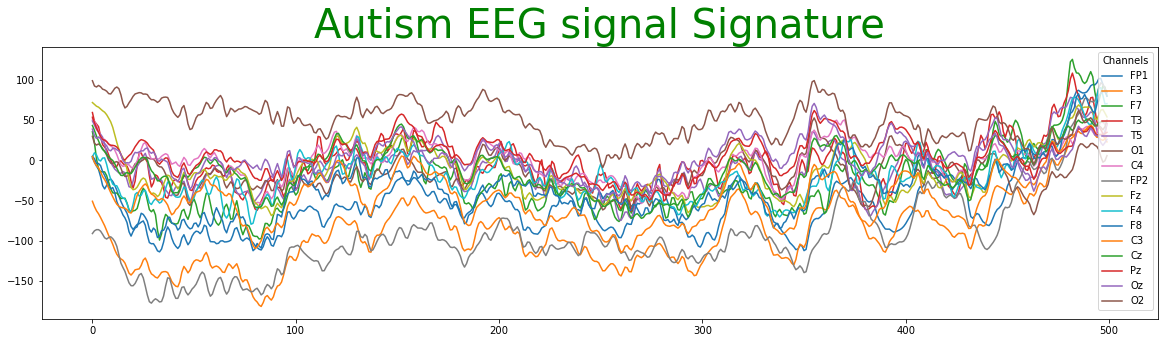

In [10]:
filename3 = "./dataset - Copy/autism/Bader_Autism_24_11_2011S001R01.dat"
with b2k.BCI2kReader(filename3) as test3:
        my_states = test3.read(-1)
        my_signals3, stateslice3 = test3[100:5000]
        
plot_autism_eeg = pd.DataFrame(my_signals3)
plot_autism_eeg = pd.DataFrame.transpose(plot_autism_eeg)

plt.figure(figsize = (20,5))
plt.plot(plot_autism_eeg)
plt.legend(['FP1', 'F3', 'F7', 'T3', 'T5', 'O1', 'C4', 'FP2', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Pz', 'Oz', 'O2',],
            loc='upper right', title='Channels')
plt.title("Autism EEG signal Signature",  fontsize=40, color="green")

Text(0.5, 1.0, 'Normal EEG signal Signature')

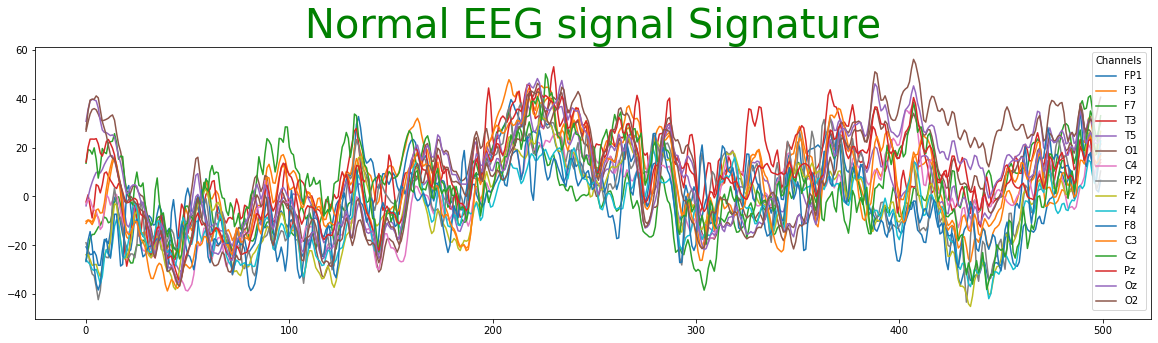

In [11]:
plot_normal_eeg = pd.DataFrame(my_signals)
plot_normal_eeg = pd.DataFrame.transpose(plot_normal_eeg)

plt.figure(figsize = (20,5))
plt.plot(plot_normal_eeg)
plt.legend(['FP1', 'F3', 'F7', 'T3', 'T5', 'O1', 'C4', 'FP2', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Pz', 'Oz', 'O2',],
            loc='upper right', title='Channels')
plt.title("Normal EEG signal Signature",  fontsize=40, color="green")

In [50]:
raw2.shape

(16, 4900)

In [51]:
plot_autism_eeg.index

RangeIndex(start=0, stop=4900, step=1)

In [52]:
all_fixed_eeg_dataset = pd.DataFrame([],)

all_fixed_eeg_dataset = all_fixed_eeg_dataset.append(df_normal)
all_fixed_eeg_dataset = all_fixed_eeg_dataset.append(df_epileps)

In [53]:
all_fixed_eeg_dataset.head(100)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.624347,23.979383,-0.026037,-71.956501,69.679501,0.116477,19.913599,0.005849,-50.457,49.137,...,21.025196,0.0485,-55.015124,56.557873,0.225384,22.052794,0.01022,-55.864875,57.292126,NORMAL
1,-0.676386,19.131838,-0.035354,-49.1865,46.513501,0.368772,17.258625,0.021367,-45.408001,46.464001,...,19.018234,-0.108311,-49.178249,45.531749,-1.570773,17.78528,-0.088319,-47.668499,44.599499,NORMAL
2,-0.233317,29.305481,-0.007962,-74.843999,75.965999,-1.072103,29.843842,-0.035924,-77.418,76.296,...,27.717913,0.017391,-74.468624,76.044373,1.925537,28.183655,0.068321,-77.797499,80.734499,NORMAL
3,-1.274891,29.377941,-0.043396,-73.354876,69.370126,-0.2455,28.67967,-0.00856,-74.023125,74.245876,...,26.562658,0.054988,-61.7265,64.333501,1.432005,26.86068,0.053312,-60.352874,61.516125,NORMAL
4,2.870057,31.392519,0.091425,-68.050125,71.770874,2.72708,23.715925,0.114989,-63.545623,68.751373,...,20.715286,0.091967,-53.670375,56.714626,1.652162,21.331612,0.077451,-55.44,57.090001,NORMAL
0,-3.104909,34.016403,-0.091277,-79.620751,75.941252,-8.819782,56.12722,-0.157139,-135.955875,119.761124,...,92.212738,0.024448,-241.576496,249.991494,3.604031,50.467869,0.071412,-143.842877,154.906127,AUTISM
1,44.203735,455.095703,0.097131,-132.713625,157.191377,91.362656,549.767212,0.166184,-164.26987,205.099117,...,293.772247,-0.013588,-132.045375,161.291626,-3.446635,364.523651,-0.009455,-112.418625,112.410375,AUTISM
2,-8.550959,91.352348,-0.093604,-299.796754,287.207252,-14.699034,106.559555,-0.137942,-371.456252,356.721749,...,90.092659,-0.067152,-312.563622,300.47737,-6.082263,87.958145,-0.06915,-304.717881,288.655128,AUTISM
3,-1.037109,33.312073,-0.031133,-86.513625,83.073375,-7.550764,57.545147,-0.131215,-140.761501,133.996501,...,27.136555,-0.006782,-70.9335,71.758501,-1.030657,26.9391,-0.038259,-75.318376,72.818627,AUTISM
4,0.591081,310.90451,0.001901,-589.392366,589.994612,6.541457,91.078812,0.071822,-184.651499,186.004499,...,52.24884,0.071341,-142.951876,142.333124,3.94482,50.294724,0.078434,-129.483752,128.77425,AUTISM


In [54]:
label_mapping = {'NORMAL': 0, 'AUTISM': 1}

In [58]:
from sklearn.model_selection import train_test_split
def preprocess_inputs(df):
    df = df.copy()
    
    df[80] = df[80].replace(label_mapping)
    
    y = df[80].copy()
    X = df.drop(80, axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [59]:
X_train, X_test, y_train, y_test = preprocess_inputs(all_fixed_eeg_dataset)

In [60]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [61]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
4,0.591081,310.904510,0.001901,-589.392395,589.994629,6.541457,91.078812,0.071822,-184.651505,186.004501,...,3.727485,52.248840,0.071341,-142.951874,142.333130,3.944820,50.294724,0.078434,-129.483749,128.774246
3,-1.037109,33.312073,-0.031133,-86.513626,83.073372,-7.550764,57.545147,-0.131215,-140.761505,133.996506,...,-0.184046,27.136555,-0.006782,-70.933502,71.758499,-1.030657,26.939100,-0.038259,-75.318375,72.818626
6,-0.560912,76.023560,-0.007378,-113.115753,107.390251,-1.246537,61.854919,-0.020153,-114.806999,113.289001,...,-0.758953,47.726425,-0.015902,-103.838623,102.642372,-0.769015,52.411179,-0.014673,-98.781372,96.347626
3,-1.274891,29.377941,-0.043396,-73.354874,69.370125,-0.245500,28.679670,-0.008560,-74.023125,74.245872,...,1.460634,26.562658,0.054988,-61.726501,64.333504,1.432005,26.860680,0.053312,-60.352875,61.516125
1,-0.676386,19.131838,-0.035354,-49.186501,46.513500,0.368772,17.258625,0.021367,-45.408001,46.464001,...,-2.059880,19.018234,-0.108311,-49.178249,45.531750,-1.570773,17.785280,-0.088319,-47.668499,44.599499
1,44.203735,455.095703,0.097131,-132.713623,157.191376,91.362656,549.767212,0.166184,-164.269867,205.099121,...,-3.991848,293.772247,-0.013588,-132.045380,161.291626,-3.446635,364.523651,-0.009455,-112.418625,112.410378
10,-6.008857,102.754066,-0.058478,-295.795502,300.250488,-8.091721,143.963516,-0.056207,-456.336365,440.570618,...,-7.693645,123.466301,-0.062314,-413.395142,414.145874,-6.523611,138.578613,-0.047075,-411.625519,404.068512
7,-0.768482,34.711796,-0.022139,-81.757500,79.414505,-2.048633,27.969870,-0.073244,-74.084999,71.445000,...,-0.826784,53.443165,-0.015470,-91.438873,84.550125,-0.455056,44.132179,-0.010311,-81.052124,75.928879
2,-0.233317,29.305481,-0.007962,-74.844002,75.965996,-1.072103,29.843842,-0.035924,-77.417999,76.295998,...,0.482056,27.717913,0.017391,-74.468620,76.044373,1.925537,28.183655,0.068321,-77.797501,80.734497
8,-1.871585,43.747368,-0.042782,-94.235626,84.525375,-1.327664,22.958767,-0.057828,-64.845001,62.139000,...,13.829736,163.514069,0.084578,-332.165619,362.649384,-1.258452,102.229568,-0.012310,-175.588882,169.096130


In [62]:
y_train

4     1
3     1
6     1
3     0
1     0
1     1
10    1
7     1
2     0
8     1
9     1
Name: 80, dtype: int64

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu',input_shape=[80]),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='sigmoid'),
        
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
print(model.summary())

ValueError: Input 0 of layer "conv1d_2" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 80)

In [149]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_data = (X_test,y_test),
    batch_size=100,
    epochs=100,
    verbose = 2,
    shuffle = True,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
   ]
)

Epoch 1/100
1/1 - 1s - loss: 6.8204e-04 - accuracy: 1.0000 - val_loss: 1.8901 - val_accuracy: 0.6000 - 682ms/epoch - 682ms/step
Epoch 2/100
1/1 - 0s - loss: 5.3384e-04 - accuracy: 1.0000 - val_loss: 1.4984 - val_accuracy: 0.8000 - 48ms/epoch - 48ms/step
Epoch 3/100
1/1 - 0s - loss: 7.9918e-04 - accuracy: 1.0000 - val_loss: 1.7067 - val_accuracy: 0.8000 - 45ms/epoch - 45ms/step
Epoch 4/100
1/1 - 0s - loss: 3.2454e-04 - accuracy: 1.0000 - val_loss: 3.4104 - val_accuracy: 0.6000 - 45ms/epoch - 45ms/step
Epoch 5/100
1/1 - 0s - loss: 2.3360 - accuracy: 0.7273 - val_loss: 1.7177 - val_accuracy: 0.8000 - 53ms/epoch - 53ms/step


In [150]:
model_acc = model.evaluate(X_test.values.astype(np.float32), y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 80.000%


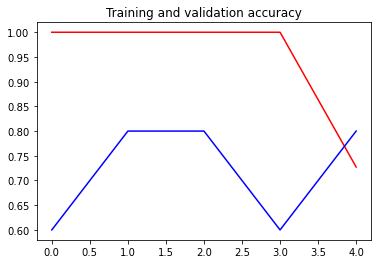

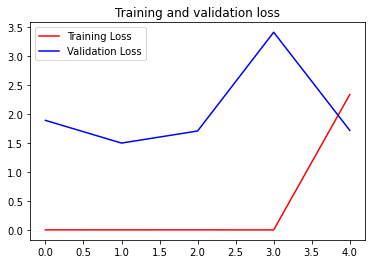

In [151]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [126]:
def data_extraction_pred(raw):
    combine_dataframe = []
    for i in range(16):
        mean = raw.values[i].mean() #mean setiap channel (channel = index array)
        combine_dataframe.append(float(mean))

        std = raw.values[i].std()
        combine_dataframe.append(float(std))

        snr = signaltonoise(raw.values[i])
        combine_dataframe.append(float(snr))
        
        min_iqr, max_iqr = quantilee(raw.values[i])
        combine_dataframe.append(float(min_iqr))
        combine_dataframe.append(float(max_iqr))
    
    #final_dataframe = pd.DataFrame(combine_dataframe, index = ['FP1_mean', 'FP1_std', 'FP1_snr', 'F3_mean', 'F3_std', 'F3_snr', 'F7_mean', 'F7_std', 'F7_snr', 'T3_mean', 'T3_std', 'T3_snr','T5_mean', 'T5_std', 'T5_snr','O1_mean', 'O1_std', 'O1_snr','C4_mean', 'C4_std', 'C4_snr','FP2_mean', 'FP2_std', 'FP2_snr','Fz_mean', 'Fz_std', 'Fz_snr','F4_mean', 'F4_std', 'F4_snr','F8_mean', 'F8_std', 'F8_snr','C3_mean', 'C3_std', 'C3_snr','Cz_mean', 'Cz_std', 'Cz_snr','Pz_mean', 'Pz_std', 'Pz_snr','Oz_mean', 'Oz_std', 'Oz_snr','O2_mean', 'O2_std', 'O2_snr'])
    final_dataframe = pd.DataFrame(combine_dataframe)
    final_dataframe = pd.DataFrame.transpose(final_dataframe)
    final_dataframe.reset_index()
    return final_dataframe

In [129]:
classes = model.predict(data_extraction_pred(plot_normal_eeg), batch_size=500)
print(classes[0])
if classes[0] > 0.5:
    print("its Autism")
else:
    print("its Normal")

1/1 [==============================] - 0s 23ms/step
[0.00094933]
its Normal


In [130]:
classes = model.predict(data_extraction_pred(plot_autism_eeg), batch_size=500)
print(classes[0])
if classes[0] > 0.5:
    print("its Autism")
else:
    print("its Normal")

1/1 [==============================] - 0s 19ms/step
[0.9993216]
its Autism


In [142]:
df_normal = pd.DataFrame([], )
label = 'NORMAL'
for filename in glob.glob('./dataset - Copy/normal/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:1000]
        raw = pd.DataFrame(my_signals)
        raw = pd.DataFrame.transpose(raw)
        classes = model.predict(data_extraction_pred(raw), batch_size=500)
        print(classes[0])
        if classes[0] > 0.9995:
            print("its Autism")
        else:
            print("its Normal")

1/1 [==============================] - 0s 23ms/step
[0.9989968]
its Normal
1/1 [==============================] - 0s 23ms/step
[0.01913304]
its Normal
1/1 [==============================] - 0s 21ms/step
[0.99943095]
its Normal
1/1 [==============================] - 0s 20ms/step
[0.999416]
its Normal
1/1 [==============================] - 0s 21ms/step
[0.00094933]
its Normal


In [143]:
df_normal = pd.DataFrame([], )
label = 'AUTISM'
for filename in glob.glob('./dataset - Copy/autism/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:1000]
        raw = pd.DataFrame(my_signals)
        raw = pd.DataFrame.transpose(raw)
        classes = model.predict(data_extraction_pred(raw), batch_size=500)
        print(classes[0])
        if classes[0] > 0.998:
            print("its Autism")
        else:
            print("its Normal")

1/1 [==============================] - 0s 20ms/step
[0.9993216]
its Autism
1/1 [==============================] - 0s 21ms/step
[0.9993698]
its Autism
1/1 [==============================] - 0s 22ms/step
[0.9994317]
its Autism
1/1 [==============================] - 0s 20ms/step
[0.9994317]
its Autism
1/1 [==============================] - 0s 21ms/step
[0.99934345]
its Autism
1/1 [==============================] - 0s 21ms/step
[0.9993465]
its Autism
1/1 [==============================] - 0s 22ms/step
[0.767979]
its Normal
1/1 [==============================] - 0s 27ms/step
[0.999417]
its Autism
1/1 [==============================] - 0s 22ms/step
[0.9994156]
its Autism
1/1 [==============================] - 0s 19ms/step
[0.9994284]
its Autism
1/1 [==============================] - 0s 19ms/step
[0.9993434]
its Autism


In [144]:
export_dir = 'saved_model_improved'

# Use the tf.saved_model API to save your model in the SavedModel format
tf.saved_model.save(model, export_dir = export_dir)

INFO:tensorflow:Assets written to: saved_model_improved\assets


In [145]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [146]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()
open("converted_model_improved.tflite", "wb").write(tflite_model)

8572532

In [148]:
model.save('saved_model_improved','/model_save_path')
model.save('trained_model_saved_model_improved.h5')
print(' Model saved ')

INFO:tensorflow:Assets written to: saved_model_improved\assets
 Model saved 
